# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

In [2]:
credits_df = pd.read_csv("./data/UCI_Credit_Card.csv")
target = "default.payment.next.month"
print(credits_df.head())
print(credits_df.shape)
credits_df.describe()

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Read the dataset and look at it using head() and describe().

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
train_df, test_df = train_test_split(credits_df, test_size=0.3, random_state=76)

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [4]:
print(train_df.info())
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


We can see from this that the mean age is 35.47 with max at 75 and sd of 9.12, this shows the ages are dispersed.
Also the mean of default.payment.next.month is 0.222, which shows less people will default comparing to not default.

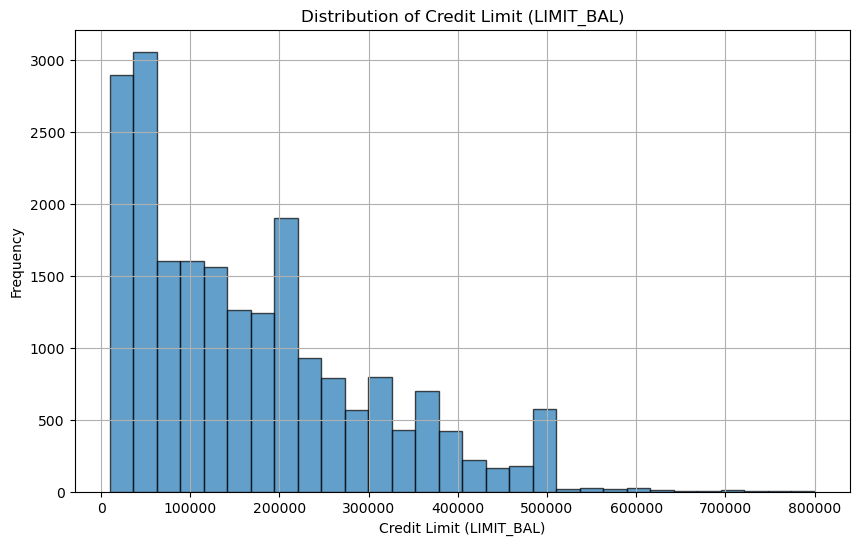

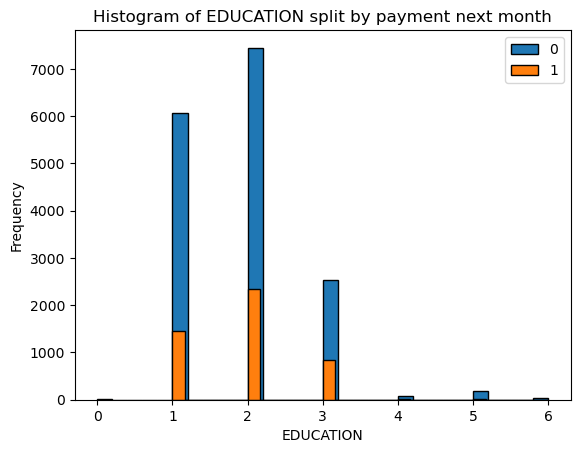

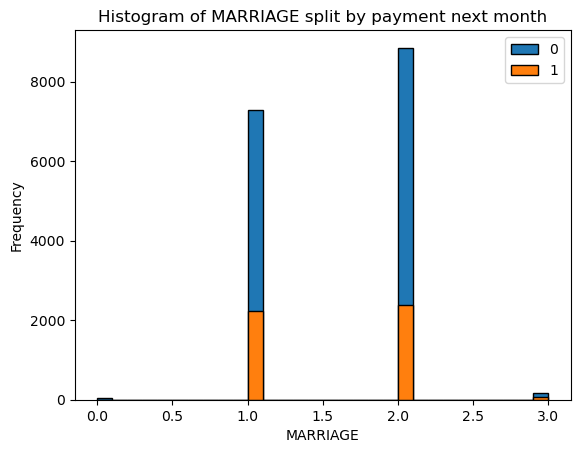

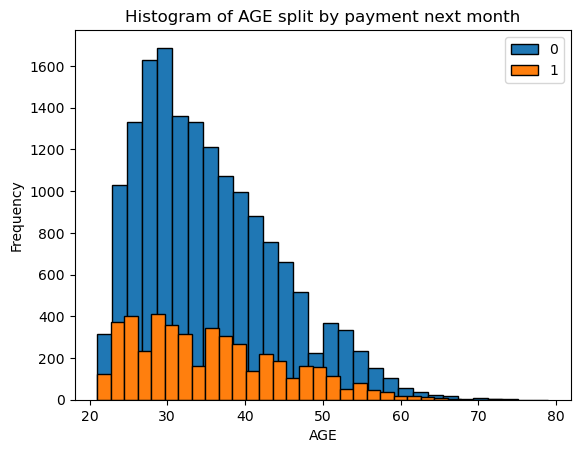

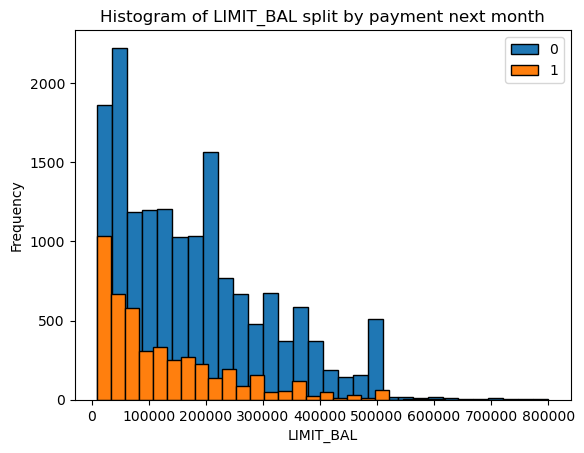

In [5]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hist(train_df['LIMIT_BAL'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Frequency')

plt.show()

for feature in ['EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL']:
    train_df.groupby(target)[feature].plot.hist(bins=30, edgecolor='black', legend = True)
    plt.title("Histogram of " + feature + " split by payment next month")
    plt.xlabel(feature)
    plt.show()

From the first graph, we can see that there are more people with lower credit limit.
From the following four graphs, with blue columns (0) as people didn't default, and orange columns (1) as people did default, we can see that people with less credit limit, at age bretween 20-30, are more likely to default. Also there are slightly more people that with university education level will default comparing to graduate school and high school, however it may because more people have university degree comparing to other education level.
Also find it's not really relevent whether people will default in relation with people marriage.

I will pick accuracy, precision, recall, f1 score as measuring metrics for assessment, as our dataset is imbalance, choosing these metrics can give me more informations.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

In [7]:
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
drop_features = ['ID']

column_transformer = make_column_transformer(
    (StandardScaler(), numerical_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("drop", drop_features)
)

Since we don't have any missing data, we don't need to use a imputer. We transform numeric features with standard scaler, and one hot encoder with cateogical_features.
To decide which feature is which kind of feature, I looked at its Dtype. the ones with int64 are categorical featues and the ones with float64 are numerical features.

Although we can handle SEX as binary one hot encoder but it won't make much of difference on the result.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [8]:
# adapted from hw3
X_train, y_train = (
    train_df.drop(columns=target),
    train_df[target],
)
X_test, y_test = (
    test_df.drop(columns=target),
    test_df[target],
)

X_train, y_train, X_test, y_test

(          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
 8958    8959   340000.0    1          1         2   44      0      0      0   
 22752  22753   200000.0    2          2         2   34      0      0      0   
 25882  25883    80000.0    2          2         1   26      0      0      0   
 12925  12926    80000.0    2          2         1   45      0      0      0   
 23598  23599    80000.0    2          2         1   40     -1     -1     -1   
 ...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
 22810  22811   150000.0    2          3         1   42     -1     -1     -1   
 6528    6529    90000.0    2          5         2   23      0      0      0   
 9607    9608    80000.0    2          1         1   35     -1      2     -1   
 12279  12280    80000.0    2          2         1   27     -1     -1     -1   
 2721    2722   100000.0    2          1         2   33      0      0      0   
 
        PAY_4  ...  BILL_AMT3  BILL_AM

In [9]:
def pipe(model):
    return make_pipeline(column_transformer, model)

In [10]:
# adapter from hw3
dummy = DummyClassifier(strategy="most_frequent")
dummy_pipe = pipe(dummy)
score = cross_validate(dummy_pipe, X_train, y_train, return_train_score=True, cv = 5)
pd.DataFrame(score).mean()

fit_time       0.025443
score_time     0.007044
test_score     0.778143
train_score    0.778143
dtype: float64

I use DummyClassifier as the basline model, before cross validate, I used a pipeline to handle transformation with column_transformer.

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [11]:
lr = LogisticRegression(max_iter=1000, random_state=76)
first_attempt = pd.DataFrame(cross_validate(pipe(lr), X_train, y_train, return_train_score=True, cv = 5))
first_attempt.mean()

fit_time       0.164749
score_time     0.007602
test_score     0.818667
train_score    0.820429
dtype: float64

Above is the result of first attemp of linear model, which used Logistic regerssion.

In [12]:
lr_pipe = pipe(lr)
# adapted from hw4
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lr_pipe, param_grid, n_jobs=-1, return_train_score=True)

grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)

best_C = grid_search.best_params_['logisticregression__C']
best_score = grid_search.best_score_
print(f"Best C: {best_C}")
print(f"Best score: {best_score}")
cv_results[['param_logisticregression__C', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]

Best C: 0.1
Best score: 0.8188095238095239


,param_logisticregression__C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.01,0.813952,0.003485,0.814964,0.001134
1,0.1,0.818810,0.003630,0.819976,0.001059
2,1,0.818667,0.003172,0.820429,0.000950
3,10,0.818476,0.003287,0.820560,0.000895
4,100,0.818238,0.003399,0.820571,0.001038


In [13]:
best_pipe = make_pipeline(column_transformer, LogisticRegression(max_iter=1000, random_state=76, C=best_C))
best_pipe.fit(X_train, y_train)
# predictions = best_pipe.predict(X_test)
print(
    classification_report(
        y_test, best_pipe.predict(X_test), target_names=["not-default", "default"]
    )
)

              precision    recall  f1-score   support

 not-default       0.84      0.95      0.89      7023
     default       0.68      0.36      0.47      1977

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



On the first attempt, we get result test score of 0.818667, after find the best value of C using grid search, the score increased to  0.8188. Which is higher then before.

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [14]:
# adopted from hw3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [15]:
# adapted from hw3
models = {
    "SVC": SVC(random_state=76),
    "kNN": KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(n_jobs=-1, random_state=76)
}

target_pred_results_df = {}

for model in models:
    selected_model = models[model]
    pipe = make_pipeline(column_transformer, selected_model)
    target_pred_results_df[model] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True
    )
target_pred_results_df = pd.DataFrame(target_pred_results_df).T

/var/folders/yl/062b3gxn3sjd2m_43qtpm9240000gn/T/ipykernel_76133/976991826.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/yl/062b3gxn3sjd2m_43qtpm9240000gn/T/ipykernel_76133/976991826.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/yl/062b3gxn3sjd2m_43qtpm9240000gn/T/ipykernel_76133/976991826.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

In [16]:
target_pred_results_df

,fit_time,score_time,test_score,train_score
SVC,10.274 (+/- 0.257),1.602 (+/- 0.020),0.818 (+/- 0.004),0.823 (+/- 0.001)
kNN,0.031 (+/- 0.005),2.969 (+/- 0.241),0.793 (+/- 0.004),0.843 (+/- 0.001)
RandomForest,1.924 (+/- 0.069),0.035 (+/- 0.002),0.817 (+/- 0.005),1.000 (+/- 0.000)


We can see from the result, all three models are not better than the Linear model, with the SVC very close to the linear model. All of these three are over fitting with the RandomForest overfitting the most.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [17]:
models = {
        'SVC': (SVC(random_state=76), 
                {'svc__C': [0.1, 1, 10, 100]}),
        'kNN': (KNeighborsClassifier(), 
                {'kneighborsclassifier__n_neighbors': [1, 5, 10]}),
        'RandomForest': (RandomForestClassifier(random_state=76), 
                        {'randomforestclassifier__n_estimators': [10, 50, 100],
                        'randomforestclassifier__max_depth': [None, 10, 20],
                        'randomforestclassifier__max_features': [10, 50, 100]})
}
results = {}
for model_name, (model, param_grid) in models.items():
        pipeline = make_pipeline(column_transformer, model)
        grid_search = RandomizedSearchCV(pipeline, param_grid, return_train_score=True, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        results[model_name] = pd.DataFrame(grid_search.cv_results_)

        print(f"Results for {model_name}:")
        print(results[model_name][['param_' + k for k in param_grid.keys()] + 
                                ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time']])
        print("Best Parameters:", grid_search.best_params_)
        print("Best Cross-Validation Score:", grid_search.best_score_)
        print("\n")

/Users/jefferyg/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Results for SVC:
  param_svc__C  mean_test_score  std_test_score  mean_train_score  \
0          0.1         0.815143        0.002856          0.815571   
1            1         0.817714        0.003449          0.822595   
2           10         0.815952        0.003144          0.843190   
3          100         0.798333        0.004875          0.886238   

   std_train_score  mean_fit_time  std_fit_time  
0         0.000812      16.851837      0.266975  
1         0.000900      19.307126      0.986060  
2         0.001142      29.215607      0.940542  
3         0.001125      64.606191      6.906798  
Best Parameters: {'svc__C': 1}
Best Cross-Validation Score: 0.8177142857142856




/Users/jefferyg/opt/anaconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Results for kNN:
  param_kneighborsclassifier__n_neighbors  mean_test_score  std_test_score  \
0                                       1         0.729762        0.005051   
1                                       5         0.793286        0.003526   
2                                      10         0.807952        0.001369   

   mean_train_score  std_train_score  mean_fit_time  std_fit_time  
0          0.999595         0.000127       0.141077      0.025585  
1          0.843262         0.001323       0.461306      0.379398  
2          0.824774         0.000764       0.920805      0.663654  
Best Parameters: {'kneighborsclassifier__n_neighbors': 10}
Best Cross-Validation Score: 0.807952380952381


Results for RandomForest:
  param_randomforestclassifier__n_estimators  \
0                                        100   
1                                         10   
2                                         10   
3                                        100   
4                       

The validation score of SVC, kNN, and Random Forest are 0.8177, 0.8079, and 0.8190.
Out of these three models, the Random Forest model is getting the best score, next is SVC, then following kNN.

The Random Forest got the following parameters values: n_estimators: 100, max_features: 10, max_depth: 10.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [18]:
best_max_features = grid_search.best_params_['randomforestclassifier__max_features']
best_n_estimators = grid_search.best_params_['randomforestclassifier__n_estimators']
best_max_depth = grid_search.best_params_['randomforestclassifier__max_depth']

best_RF_pipe = make_pipeline(column_transformer, RandomForestClassifier(max_features=best_max_features, n_estimators=best_n_estimators, max_depth= best_max_depth, random_state=76))
best_RF_pipe.fit(X_train, y_train)
RF_test_score = best_RF_pipe.score(X_test, y_test)
print(
    classification_report(
        y_test, best_RF_pipe.predict(X_test), target_names=["not-default", "default"]
    )
)
RF_test_score

              precision    recall  f1-score   support

 not-default       0.84      0.95      0.89      7023
     default       0.67      0.36      0.47      1977

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



0.8204444444444444

The test score is 0.8204, which is higher than the validation score and the highest among other models. Given the consistency between the validation scores and the test accuracy, which are both 0.82, we can trust our results to a reasonable extent. The hyperparameter tuning process appears to have been effective, as the validation scores are close to the test score, indicating minimal overfitting, the impact of optimization bias is minimal at here.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [20]:

final_results= {
    'Model': ['Value'],
    'baseline model': [0.7781],
    'Linear Model': [0.8188],
    'SVC': [0.8177],
    'kNN': [0.8079],
    'Random Forest': [0.8190],
    'Random Forest Test Score': [0.8204],
    'RF parameters used': ['max_features = 10, n_estimators = 100, max_depth = 10'],
    'Test Accuracy': [0.82],
    'Test weighted avg Precision': [0.80],
    'Test weighted avg Recall': [0.82],
    'Test weighted avg F1 Score': [0.80],

}
pd.DataFrame(final_results).T

,0
Model,Value
baseline model,0.7781
Linear Model,0.8188
SVC,0.8177
kNN,0.8079
Random Forest,0.819
Random Forest Test Score,0.8204
RF parameters used,"max_features = 10, n_estimators = 100, max_dep..."
Test Accuracy,0.82
Test weighted avg Precision,0.8


The Random Forest model showed the highest cross-validation score (0.8190) and the highest test accuracy (0.8204), indicating it is the best performing model among those tested.
The Linear Model and SVC also performed well, with scores of 0.8188 and 0.8177, respectively, suggesting that linear and SVM-based models are suitable for this classification task.
The kNN model had the lowest performance (0.8079), which may indicate that instance-based learning is less effective for this dataset. The Random Forest model achieved a test accuracy of 0.82, aligning well with its cross-validation performance.

The result is robust as the test accuracy of 0.82 closely matches the cross-validation score of 0.819 for the Random Forest model, suggesting that the model generalizes well to unseen data. While optimization bias is always a concern, the consistency between cross-validation and test results suggests that the chosen hyperparameters are effective and not overly tuned to the training data.

The Random Forest model demonstrated the best performance, both in cross-validation and on the test set, making it the most suitable model for this task among those tested. While the results are promising, further improvements could be achieved through , hyperparameter optimization with higher range, and handling class imbalance.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!